# Python: Invoeren (meet)waarden)
Tijdens het uitvoeren van metingen zul je de meetwaarden opslaan. Door deze waarden in te voeren in een python-programma kunnen r disgrammen mee worden gemaakt. Die geven een beter overzicht van de resulaten.  

## Leerdoelen
- Invoeren van gegevens
- Maken van diagrammen
- Pandas functies
- Plotten

```{exercise}
Run de cell hieronder.
```

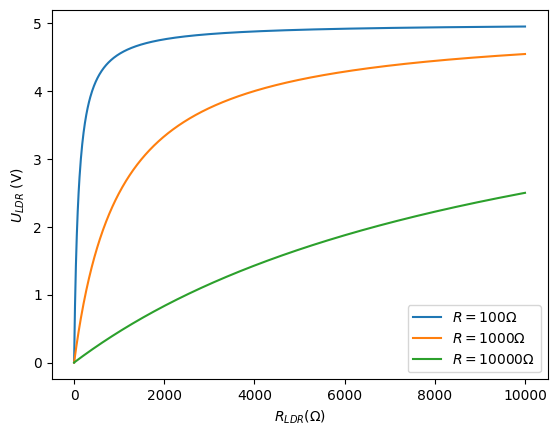

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def U_LDR(U_b, R, R_LDR):
    return R_LDR/(R+R_LDR)*U_b

R_LDR = np.linspace(0,int(1e4),1000)

plt.figure()
plt.plot(R_LDR,U_LDR(5,100,R_LDR),label="$R=100Ω$")
plt.plot(R_LDR,U_LDR(5,1000,R_LDR),label="$R=1000Ω$")
plt.plot(R_LDR,U_LDR(5,10000,R_LDR),label="$R=10000Ω$")
plt.xlabel('$R_{LDR} (Ω)$')
plt.ylabel('$U_{LDR}$ (V)')

plt.legend()
plt.show()

```{exercise}
Bekijk de code hierboven en leg uit wat elke coderegel doet. Verbeter de grafiek (layout).
```

## Handmatige invoer variabelen

Tot nu toe zijn we bezig geweest zonder ons druk te maken over de naamgeving van onze variabelen of onze code te voorzien van uitleg, zogenaamde meta-data. Het is een goede gewoonte om daar wel zorg aan te besteden, het de lezer - maar ook jezelf - makkelijk te maken door functies en variabelen zo te noemen dat ze makkelijk leesbaar zijn. Stukken code die lastiger te begrijpen zijn kun je voorzien van commentaar. Een \# kun je gebruiken om commentaar toe te voegen.

```{exercise}
Lees de code in beide cellen. Welke code is makkelijker te volgen?
```

In de onderstaande programma worden de waarden van de variabelen 'a' en 'b' bij elkaar opgeteld.

In [1]:
a = 9
b = 3

def s(a,b):
    s = a+b
    return print(s)

s(a,b)

12


Het zal vaak voorkomen dat je dezelfde berekening met steeds andere waarden voor de variablen wit uitvoeren. Dan is hrt handig om deze waarden handmatig te kunnen invoeren. Dat kan door gebruik te maken van het commando 'input', zoals in de cel hieronder is beschreven. Run de cel en kijk wat er gebeurd.

In [2]:
# code om de som van twee getallen te berekenen ion standaard python
getal_1 = float(input(f"geef de waarde voor het eerste getal"))
getal_2 = float(input(f"geef de waarde voor het tweede getal"))
# het input-commando levert in JupyterLite een variable van het type PyodideFuture. Dit kan niet worden omgezet in een float of een integer

# functie om de som van twee getallen te berekenen
def som(getal1,getal2):
    return getal1 + getal2

print("De som van", getal_1, "+", getal_2, "= ", som(getal_1,getal_2))

De som van 5.4 + 6.7 =  12.100000000000001


In [24]:
import ipywidgets as widgets
from IPython.display import display

# functie om de som van twee getallen te berekenen
def som(getal1, getal2):
    return getal1 + getal2

# widgets voor input
getal_1 = widgets.FloatText(description="Eerste getal:")
getal_2 = widgets.FloatText(description="Tweede getal:")
button = widgets.Button(description="Bereken")

# functie om de som te berekenen en weer te geven
def bereken(b):
    resultaat = som(getal_1.value, getal_2.value)
    print(f"De som van {getal_1.value} + {getal_2.value} = {resultaat}")

button.on_click(bereken)

# display widgets
display(getal_1, getal_2, button)


FloatText(value=0.0, description='Eerste getal:')

FloatText(value=0.0, description='Tweede getal:')

Button(description='Bereken', style=ButtonStyle())

De som van 5.6 + 19.3 = 24.9


In [23]:
import nest_asyncio
import asyncio
import ipywidgets as widgets
from IPython.display import display

# pas nest_asyncio toe om nested event loops mogelijk te maken
nest_asyncio.apply()

# functie om de som van twee getallen te berekenen
def som(getal1, getal2):
    return getal1 + getal2

# widgets voor input
getal_1 = widgets.FloatText(description="Eerste getal:")
getal_2 = widgets.FloatText(description="Tweede getal:")
button = widgets.Button(description="Bereken")

# functie om de som te berekenen en weer te geven
def bereken(b):
    resultaat = som(getal_1.value, getal_2.value)
    print(f"De som van {getal_1.value} + {getal_2.value} = {resultaat}")

# asynchrone functie om input op te vragen
async def vraag_input():
    display(getal_1)
    while getal_1.value is None:
        await asyncio.sleep(0.1)
    display(getal_2)
    while getal_2.value is None:
        await asyncio.sleep(0.1)
    display(button)
    button.on_click(bereken)

# start de asynchrone input
asyncio.create_task(vraag_input())

<Task pending name='Task-1' coro=<vraag_input() running at /var/folders/xz/045j3q050t1gdpnhqqd3tg0w0000gn/T/ipykernel_2167/1483573476.py:24>>

FloatText(value=0.0, description='Eerste getal:')

FloatText(value=0.0, description='Tweede getal:')

Button(description='Bereken', style=ButtonStyle())

De som van 9.8 + 7.6 = 17.4


Voer de metingen in voor 10 tijdstippen (om de 10 seconden):


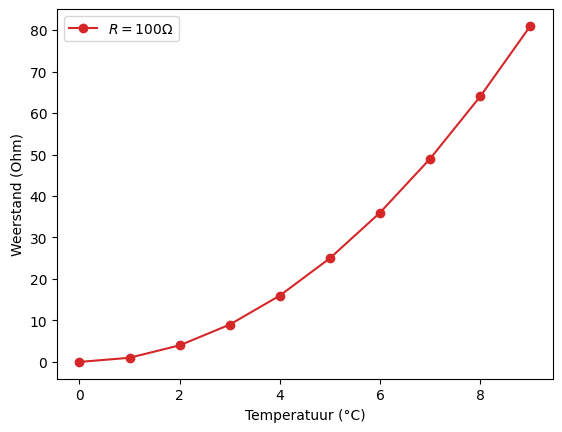

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functie om metingen in te voeren
def get_measurements():
    measurements = []
    print("Voer de metingen in voor 10 tijdstippen (om de 10 seconden):")
    for i in range(10):
        tijd = i * 10  # Tijd in seconden
        temperatuur = float(input(f"Temperatuur bij {tijd} seconden: "))
        weerstand = float(input(f"Weerstand bij {tijd} seconden: "))
        measurements.append((tijd, temperatuur, weerstand))
    return measurements

# Data ophalen
metingen = get_measurements()

# Dataframe maken
data = pd.DataFrame(metingen, columns=['Tijd (s)', 'Temperatuur (°C)', 'Weerstand (Ohm)'])

# Data plotten
color = 'tab:red'
plt.figure()
plt.plot(data['Temperatuur (°C)'], data['Weerstand (Ohm)'], color=color, marker='o',label="$R=100Ω$")

plt.xlabel('Temperatuur (°C)')
plt.ylabel('Weerstand (Ohm)')

plt.legend()
plt.show()

Voer de metingen in voor 10 tijdstippen (om de 10 seconden):


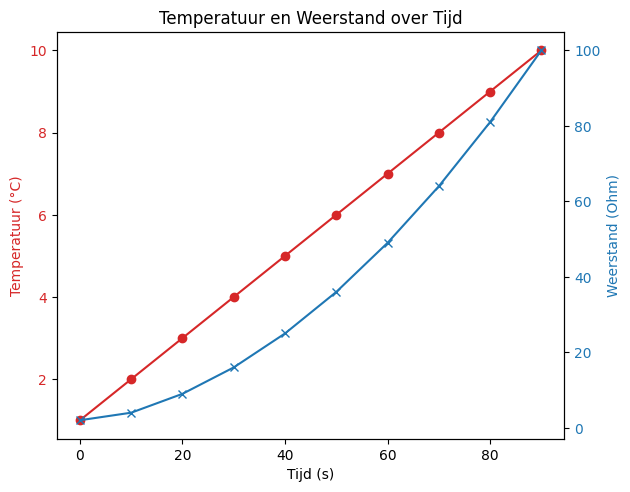

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functie om metingen in te voeren
def get_measurements():
    measurements = []
    print("Voer de metingen in voor 10 tijdstippen (om de 10 seconden):")
    for i in range(10):
        tijd = i * 10  # Tijd in seconden
        temperatuur = float(input(f"Temperatuur bij {tijd} seconden: "))
        weerstand = float(input(f"Weerstand bij {tijd} seconden: "))
        measurements.append((tijd, temperatuur, weerstand))
    return measurements

# Data ophalen
metingen = get_measurements()

# Dataframe maken
data = pd.DataFrame(metingen, columns=['Tijd (s)', 'Temperatuur (°C)', 'Weerstand (Ohm)'])

# Data plotten
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Tijd (s)')
ax1.set_ylabel('Temperatuur (°C)', color=color)
ax1.plot(data['Tijd (s)'], data['Temperatuur (°C)'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Tweede y-as
color = 'tab:blue'
ax2.set_ylabel('Weerstand (Ohm)', color=color)
ax2.plot(data['Tijd (s)'], data['Weerstand (Ohm)'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Temperatuur en Weerstand over Tijd')
plt.show()


Voer de metingen in voor 10 tijdstippen (om de 10 seconden):


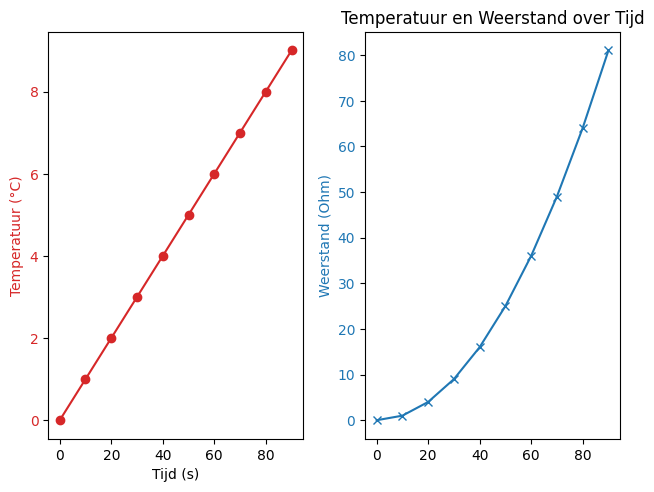

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functie om metingen in te voeren
def get_measurements():
    measurements = []
    print("Voer de metingen in voor 10 tijdstippen (om de 10 seconden):")
    for i in range(10):
        tijd = i * 10  # Tijd in seconden
        temperatuur = float(input(f"Temperatuur bij {tijd} seconden: "))
        weerstand = float(input(f"Weerstand bij {tijd} seconden: "))
        measurements.append((tijd, temperatuur, weerstand))
    return measurements

# Data ophalen
metingen = get_measurements()

# Dataframe maken
data = pd.DataFrame(metingen, columns=['Tijd (s)', 'Temperatuur (°C)', 'Weerstand (Ohm)'])

# Data plotten
fig, (ax1, ax2) = plt.subplots(1,2)

color = 'tab:red'
ax1.set_xlabel('Tijd (s)')
ax1.set_ylabel('Temperatuur (°C)', color=color)
ax1.plot(data['Tijd (s)'], data['Temperatuur (°C)'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.set_ylabel('Weerstand (Ohm)', color=color)
ax2.plot(data['Tijd (s)'], data['Weerstand (Ohm)'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Temperatuur en Weerstand over Tijd')
plt.show()

   Tijd (s)  Temperatuur (°C)  Weerstand (Ohm)
0         0                 0                0
1        10                 1                1
2        20                 2                4
3        30                 3                9
4        40                 4               16
5        50                 5               25
6        60                 6               36
7        70                 7               49
8        80                 8               64
9        90                 9               81


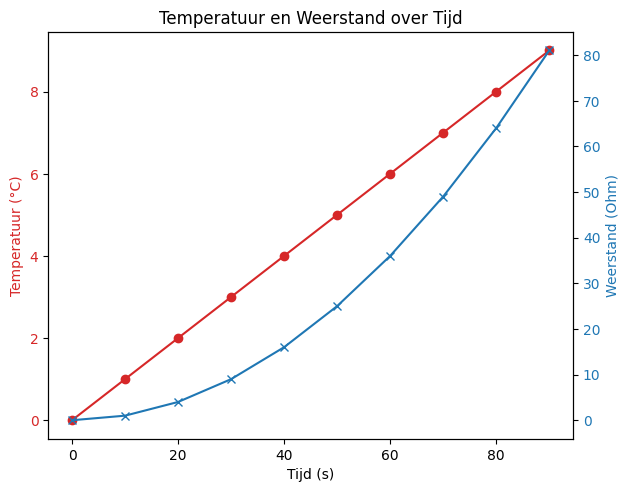

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data ophalen uit .csv-bestand
data = pd.read_csv('Temperatuur-Weerstand.csv')
print(data.to_string())

# Data plotten
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Tijd (s)')
ax1.set_ylabel('Temperatuur (°C)', color=color)
ax1.plot(data['Tijd (s)'], data['Temperatuur (°C)'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Tweede y-as
color = 'tab:blue'
ax2.set_ylabel('Weerstand (Ohm)', color=color)
ax2.plot(data['Tijd (s)'], data['Weerstand (Ohm)'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Temperatuur en Weerstand over Tijd')
plt.show()